In [1]:
import pandas as pd

In [2]:
data_df = pd.read_csv("tiki_test.csv")

In [3]:
data_df.head(10)

,Seller ID,Seller's Vertical,Sign-up Time,Activation Time,1st Listing,1st Salable,1st Transaction
0,1,Electronic,9/20/2017,2/2/2018,2/7/2018,10/6/2018,10/10/2018
1,2,BBFF,8/19/2017,5/24/2018,8/13/2018,8/14/2018,9/2/2018
2,3,BBFF,12/4/2017,5/4/2018,10/6/2018,10/10/2018,10/12/2018
3,4,BBFF,10/16/2017,4/23/2018,7/4/2018,7/10/2018,7/10/2018
4,5,BBFF,12/13/2017,7/25/2018,8/30/2018,8/31/2018,9/14/2018
5,6,LifeStyle,1/4/2018,3/21/2018,6/11/2018,9/19/2018,9/20/2018
6,7,BBFF,1/26/2018,3/6/2018,10/1/2018,10/2/2018,10/14/2018
7,8,LifeStyle,11/29/2017,5/10/2018,7/26/2018,7/28/2018,8/4/2018
8,9,BBFF,11/28/2017,4/20/2018,7/23/2018,7/24/2018,8/12/2018
9,10,BBFF,2/2/2018,3/30/2018,3/30/2018,9/27/2018,9/30/2018


In [4]:
columns = data_df.columns
columns

Index(['Seller ID', 'Seller's Vertical', 'Sign-up Time', 'Activation Time',
       '1st Listing', '1st Salable', '1st Transaction'],
      dtype='object')

In [5]:
data_df["Sign-up Time"] = pd.to_datetime(data_df["Sign-up Time"])
data_df["Activation Time"] = pd.to_datetime(data_df["Activation Time"])
data_df["1st Listing"] = pd.to_datetime(data_df["1st Listing"])
data_df["1st Salable"] = pd.to_datetime(data_df["1st Salable"])
data_df["1st Transaction"] = pd.to_datetime(data_df["1st Transaction"])

In [6]:
data_df["sign2activate"] = data_df["Activation Time"] - data_df["Sign-up Time"]
data_df["sign2list"] = data_df["1st Listing"] - data_df["Sign-up Time"]
data_df["activate2list"] = data_df["1st Listing"] - data_df["Activation Time"]
data_df["activate2sale"] = data_df["1st Salable"] - data_df["Activation Time"]
data_df["list2sale"] = data_df["1st Salable"] - data_df["1st Listing"]
data_df["activate2trans"] = data_df["1st Transaction"] - data_df["Activation Time"]
data_df["sale2trans"] = data_df["1st Transaction"] - data_df["1st Salable"]

In [7]:
data_df.dtypes

Seller ID                      int64
Seller's Vertical             object
Sign-up Time          datetime64[ns]
Activation Time       datetime64[ns]
1st Listing           datetime64[ns]
1st Salable           datetime64[ns]
1st Transaction       datetime64[ns]
sign2activate        timedelta64[ns]
sign2list            timedelta64[ns]
activate2list        timedelta64[ns]
activate2sale        timedelta64[ns]
list2sale            timedelta64[ns]
activate2trans       timedelta64[ns]
sale2trans           timedelta64[ns]
dtype: object

In [8]:
(data_df['sign2activate'][0]).days

135

In [9]:
data_df["sign2activate"] = data_df["sign2activate"].apply(lambda x: max(0, x.days))
data_df["sign2list"] = data_df["sign2list"].apply(lambda x: max(0, x.days))
data_df["activate2list"] = data_df["activate2list"].apply(lambda x: max(0, x.days))
data_df["activate2sale"] = data_df["activate2sale"].apply(lambda x: max(0, x.days))
data_df["list2sale"] = data_df["list2sale"].apply(lambda x: max(0, x.days))
data_df["activate2trans"] = data_df["activate2trans"].apply(lambda x: max(0, x.days))
data_df["sale2trans"] = data_df["sale2trans"].apply(lambda x: max(0, x.days))

In [10]:
data_df.head(5)

,Seller ID,Seller's Vertical,Sign-up Time,Activation Time,1st Listing,1st Salable,1st Transaction,sign2activate,sign2list,activate2list,activate2sale,list2sale,activate2trans,sale2trans
0,1,Electronic,2017-09-20,2018-02-02,2018-02-07,2018-10-06,2018-10-10,135,140,5,246,241,250,4
1,2,BBFF,2017-08-19,2018-05-24,2018-08-13,2018-08-14,2018-09-02,278,359,81,82,1,101,19
2,3,BBFF,2017-12-04,2018-05-04,2018-10-06,2018-10-10,2018-10-12,151,306,155,159,4,161,2
3,4,BBFF,2017-10-16,2018-04-23,2018-07-04,2018-07-10,2018-07-10,189,261,72,78,6,78,0
4,5,BBFF,2017-12-13,2018-07-25,2018-08-30,2018-08-31,2018-09-14,224,260,36,37,1,51,14


In [11]:
data_df.dtypes

Seller ID                     int64
Seller's Vertical            object
Sign-up Time         datetime64[ns]
Activation Time      datetime64[ns]
1st Listing          datetime64[ns]
1st Salable          datetime64[ns]
1st Transaction      datetime64[ns]
sign2activate                 int64
sign2list                     int64
activate2list                 int64
activate2sale                 int64
list2sale                     int64
activate2trans                int64
sale2trans                    int64
dtype: object

In [12]:
data_df["Seller\'s Vertical"].value_counts()

BBFF               1130
LifeStyle           501
Electronic          262
Book                130
Digital Service     122
Name: Seller's Vertical, dtype: int64

In [13]:
data_product_trans = data_df[["Seller\'s Vertical", "sale2trans"]]

In [14]:
data_df.shape

(2145, 14)

In [15]:
data_product_trans['sale2trans'].mean()

11.22937062937063

In [16]:
data_product_trans.groupby(by=['Seller\'s Vertical']).mean()

,sale2trans
Seller's Vertical,
BBFF,8.739823
Book,6.430769
Digital Service,23.016393
Electronic,13.534351
LifeStyle,14.013972


In [17]:
data_sign_activate = data_df[["Seller\'s Vertical", "sign2activate"]]
data_sign_activate["sign2activate"].mean()

16.342191142191144

In [18]:
data_sign_activate.groupby(by=['Seller\'s Vertical']).mean()

,sign2activate
Seller's Vertical,
BBFF,15.848673
Book,16.869231
Digital Service,23.049180
Electronic,14.583969
LifeStyle,16.604790


In [19]:
bbff_sign_activate = data_sign_activate[data_sign_activate["Seller\'s Vertical"] == 'BBFF']

In [20]:
import matplotlib.pyplot as plt

# Header
## header 1
### header 1
*Hello word*
**Hello World**
<font color=red>**Hello World**</font>

In [21]:
bbff_sign_activate['sign2activate'].max()

278

In [22]:
bbff_sign_activate['sign2activate'].min()

0

([<matplotlib.axis.XTick at 0x7f0136f51910>,
 <a list of 3 Text xticklabel objects>)

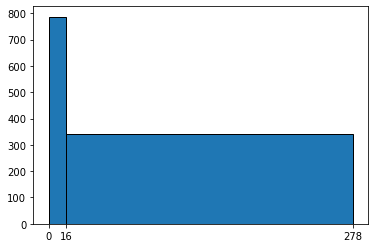

In [23]:
bins= [0, 16, 278]
plt.hist(bbff_sign_activate["sign2activate"].values, bins=bins, edgecolor="k")
plt.xticks(bins)

In [24]:
data_sign_activate["processing_level"] = data_sign_activate["sign2activate"].apply(lambda x: "fast" if x <= data_sign_activate["sign2activate"].mean() else "low")
data_sign_activate.head(10)

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Seller's Vertical,sign2activate,processing_level
0,Electronic,135,low
1,BBFF,278,low
2,BBFF,151,low
3,BBFF,189,low
4,BBFF,224,low
5,LifeStyle,76,low
6,BBFF,39,low
7,LifeStyle,162,low
8,BBFF,143,low
9,BBFF,56,low


In [25]:
activate_processing_time_df = data_sign_activate.groupby(by=['Seller\'s Vertical', 'processing_level']).size()
activate_processing_time_df

Seller's Vertical  processing_level
BBFF               fast                809
                   low                 321
Book               fast                 91
                   low                  39
Digital Service    fast                 69
                   low                  53
Electronic         fast                204
                   low                  58
LifeStyle          fast                346
                   low                 155
dtype: int64

In [26]:
activate_processing_time_df.index

MultiIndex(levels=[['BBFF', 'Book', 'Digital Service', 'Electronic', 'LifeStyle'], ['fast', 'low']],
           codes=[[0, 0, 1, 1, 2, 2, 3, 3, 4, 4], [0, 1, 0, 1, 0, 1, 0, 1, 0, 1]],
           names=['Seller's Vertical', 'processing_level'])

In [27]:
column_names = activate_processing_time_df.index.names
print(column_names)
product_name = activate_processing_time_df.index.levels[0].values
print(product_name)
process_level = activate_processing_time_df.index.levels[1].values
print(process_level)

['Seller's Vertical', 'processing_level']
['BBFF' 'Book' 'Digital Service' 'Electronic' 'LifeStyle']
['fast' 'low']


In [28]:
fast_processing = [activate_processing_time_df[i][process_level[0]] for i in product_name]
fast_processing

[809, 91, 69, 204, 346]

In [29]:
low_processing = [activate_processing_time_df[i][process_level[1]] for i in product_name]
low_processing

[321, 39, 53, 58, 155]

In [30]:
activate_processing_time_df_new = pd.DataFrame({"product_name": product_name, "fast_processing": fast_processing, "low_processing": low_processing})
activate_processing_time_df_new

,product_name,fast_processing,low_processing
0,BBFF,809,321
1,Book,91,39
2,Digital Service,69,53
3,Electronic,204,58
4,LifeStyle,346,155


In [31]:
activate_processing_time_df_new["fast_processing_percent"] = (activate_processing_time_df_new['fast_processing']/(activate_processing_time_df_new['fast_processing'] + activate_processing_time_df_new['low_processing'])).apply(lambda x: round(x, 2))
activate_processing_time_df_new["low_processing_percent"] = 1 - activate_processing_time_df_new["fast_processing_percent"]
activate_processing_time_df_new

,product_name,fast_processing,low_processing,fast_processing_percent,low_processing_percent
0,BBFF,809,321,0.72,0.28
1,Book,91,39,0.70,0.30
2,Digital Service,69,53,0.57,0.43
3,Electronic,204,58,0.78,0.22
4,LifeStyle,346,155,0.69,0.31


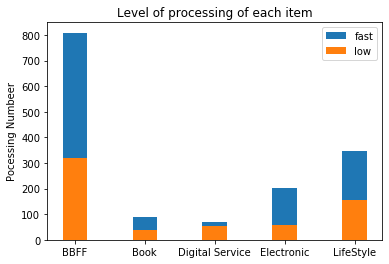

In [32]:
labels = activate_processing_time_df_new["product_name"].values
fast_processing = activate_processing_time_df_new["fast_processing"].values
low_processing = activate_processing_time_df_new["low_processing"].values
width = 0.35       # the width of the bars: can also be len(x) sequence
fig, ax = plt.subplots()
ax.bar(labels, fast_processing, width, label='fast')
ax.bar(labels, low_processing, width, label='low')

ax.set_ylabel('Pocessing Numbeer')
ax.set_title('Level of processing of each item')
ax.legend()

plt.show()

In [ ]:
labels = activate_processing_time_df_new["product_name"].values
low_processing = [1]*len(labels)
fast_processing = activate_processing_time_df_new["fast_processing_percent"].values
fast_processing_label = [str(i) for i in fast_processing]
width = 0.35       # the width of the bars: can also be len(x) sequence
fig, ax = plt.subplots()
ax.bar(labels, low_processing, width, label='fast')
ax.bar(labels, fast_processing, width, label='low')
ax.text(x, y, str(int(c)), ha='center', va='center',color=text_color)
ax.set_ylabel('Pocessing Numbeer')
ax.set_title('Level of processing of each item')

plt.show()

In [34]:
pie_chart_data = data_df["Seller\'s Vertical"].value_counts().reset_index()
pie_chart_data["product_percent"] = (pie_chart_data["Seller\'s Vertical"]/(sum(pie_chart_data["Seller\'s Vertical"]))*100).apply(lambda x: round(x, 2))
pie_chart_data

,index,Seller's Vertical,product_percent
0,BBFF,1130,52.68
1,LifeStyle,501,23.36
2,Electronic,262,12.21
3,Book,130,6.06
4,Digital Service,122,5.69


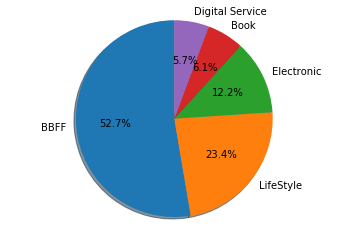

In [35]:
labels = pie_chart_data["index"].values
product_percent = pie_chart_data["product_percent"].values

fig1, ax1 = plt.subplots()
ax1.pie(product_percent, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [36]:
average_day_trans = round(data_product_trans["sale2trans"].mean(), 2)

In [40]:
data_product_trans_df = data_product_trans.groupby(by=['Seller\'s Vertical']).mean().reset_index()
data_product_trans_df

,Seller's Vertical,sale2trans
0,BBFF,8.739823
1,Book,6.430769
2,Digital Service,23.016393
3,Electronic,13.534351
4,LifeStyle,14.013972


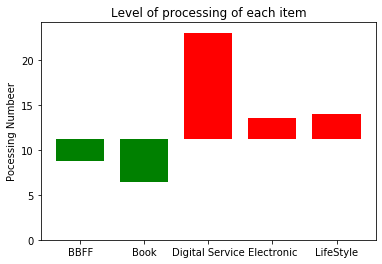

In [54]:
labels = data_product_trans_df["Seller\'s Vertical"].values
fast_processing = [x if x>=average_day_trans else average_day_trans for x in data_product_trans_df["sale2trans"].values]
low_processing = [average_day_trans if x>=average_day_trans else x for x in data_product_trans_df["sale2trans"].values]
color = ['r' if x>=average_day_trans else 'g' for x in data_product_trans_df["sale2trans"].values]
width = 0.75       # the width of the bars: can also be len(x) sequence
fig, ax = plt.subplots()
ax.bar(labels, fast_processing, width, label='fast', color= color)
ax.bar(labels, low_processing, width, label='low', color='w', )

ax.set_ylabel('Pocessing Numbeer')
ax.set_title('Level of processing of each item')

plt.show()
